# Data Analysis Project

## Import Libraries

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from IPython.display import display

## Load Dataset 

In [2]:
# data load 
df = sns.load_dataset('diamonds')
df.head() 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Saving the data 

In [3]:
# save the df into csv 
df.to_csv('../data/diamonds.csv',index=False)

# save the df into xlsx 
df.to_excel('../data/diamonds.xlsx',index=False)


## Data Composition 
In data composition we check :

    1. The structure of the dataset rows and columns .
    2. The datatypes of each column .
    3. The presence of missing values . 
    4. Basic statistics (mean, median, mode) for numerical columns .
    5. Distribution of categorical variables .

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
df.shape

(53940, 10)

# Data Analysis Toolkit

This notebook contains a comprehensive set of data analysis functions for:
1. Data Composition Analysis
2. Data Distribution Analysis 
3. Data Comparison Analysis
4. Data Relationship Analysis

## Define Analysis Functions
### 1. Data Composition Report

In [7]:
def data_composition_report(df):
    """Generate a comprehensive data composition report"""
    print("\n=== Data Composition Report ===")
    
    # Basic information
    print("\nBasic Information:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    
    # Missing values analysis
    missing_values = df.isnull().sum()
    print("\nMissing Values Summary:")
    print(missing_values[missing_values > 0])
    
    # Data types information
    print("\nData Types Information:")
    print(df.dtypes)
    
    # Memory usage
    print("\nMemory Usage:")
    print(df.memory_usage(deep=True))

### 2. Data Distribution Report

In [8]:
def data_distribution_report(df):
    """Generate distribution analysis for numerical and categorical columns"""
    print("\n=== Data Distribution Report ===")
    
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Numerical distributions
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
        
        # Statistical summary
        print(f"\nSummary Statistics for {col}:")
        print(df[col].describe())
        
        # Skewness and Kurtosis
        print(f"Skewness: {df[col].skew():.2f}")
        print(f"Kurtosis: {df[col].kurtosis():.2f}")
    
    # Categorical distributions
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col)
        plt.xticks(rotation=45)
        plt.title(f'Distribution of {col}')
        plt.show()
        
        # Value counts
        print(f"\nValue Counts for {col}:")
        print(df[col].value_counts(normalize=True))

### 3. Data Comparison Report

In [9]:
def data_comparison_report(df):
    """Generate comparisons between different variables"""
    print("\n=== Data Comparison Report ===")
    
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Box plots for numerical vs categorical
    for num_col in numerical_cols:
        for cat_col in categorical_cols:
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=df, x=cat_col, y=num_col)
            plt.xticks(rotation=45)
            plt.title(f'{num_col} by {cat_col}')
            plt.show()
            
            # ANOVA test if applicable
            categories = df[cat_col].unique()
            if len(categories) > 1:
                groups = [df[df[cat_col] == cat][num_col].values for cat in categories]
                f_stat, p_value = stats.f_oneway(*groups)
                print(f"\nANOVA test for {num_col} across {cat_col}:")
                print(f"F-statistic: {f_stat:.2f}")
                print(f"p-value: {p_value:.4f}")

### 4. Data Relationship Report

In [10]:
def data_relationship_report(df):
    """Analyze relationships between variables"""
    print("\n=== Data Relationship Report ===")
    
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Correlation matrix
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()
    
    # Scatter plots for highly correlated variables
    for i in range(len(numerical_cols)):
        for j in range(i+1, len(numerical_cols)):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) > 0.5:  # Only show strong correlations
                plt.figure(figsize=(10, 6))
                
                # Create scatter plot
                sns.scatterplot(data=df, x=numerical_cols[i], y=numerical_cols[j])
                
                # Perform linear regression using scipy
                slope, intercept, r_value, p_value, std_err = stats.linregress(
                    df[numerical_cols[i]], 
                    df[numerical_cols[j]]
                )
                
                # Add regression line
                x = np.array([df[numerical_cols[i]].min(), df[numerical_cols[i]].max()])
                y = slope * x + intercept
                plt.plot(x, y, 'r', label=f'y = {slope:.2f}x + {intercept:.2f}')
                
                plt.title(f'Scatter plot: {numerical_cols[i]} vs {numerical_cols[j]}\nCorrelation: {corr:.2f}')
                plt.legend()
                plt.show()
                
                # Print regression statistics
                print(f"\nRegression Analysis: {numerical_cols[j]} vs {numerical_cols[i]}")
                print(f"Slope: {slope:.4f}")
                print(f"Intercept: {intercept:.4f}")
                print(f"R-squared: {r_value**2:.4f}")
                print(f"P-value: {p_value:.4f}")
                print(f"Standard Error: {std_err:.4f}")

### Main Analysis Function

In [11]:
def generate_full_analysis(df):
    """Generate a complete analysis report"""
    data_composition_report(df)
    data_distribution_report(df)
    data_comparison_report(df)
    data_relationship_report(df)

## Example Usage
Here's an example using the iris dataset:


=== Data Composition Report ===

Basic Information:
Number of rows: 150
Number of columns: 5

Missing Values Summary:
Series([], dtype: int64)

Data Types Information:
sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

Memory Usage:
Index                 132
sepal length (cm)    1200
sepal width (cm)     1200
petal length (cm)    1200
petal width (cm)     1200
species               430
dtype: int64

=== Data Distribution Report ===


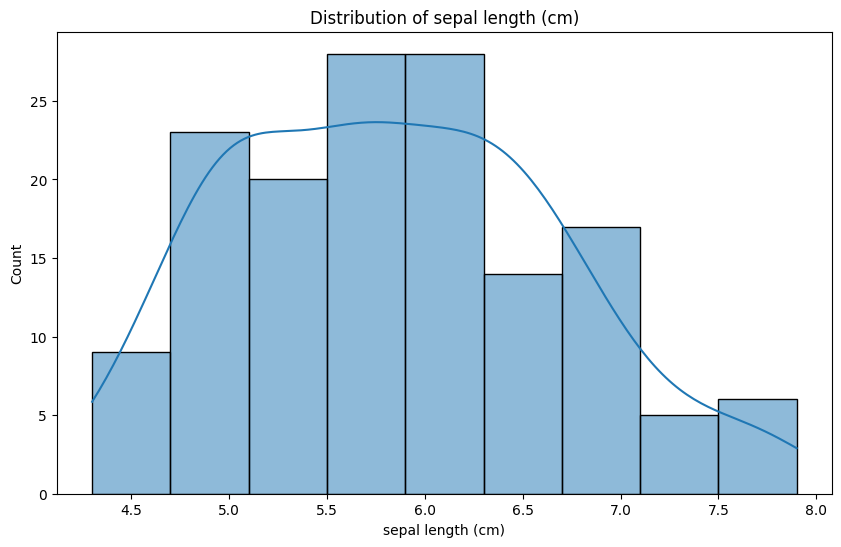


Summary Statistics for sepal length (cm):
count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64
Skewness: 0.31
Kurtosis: -0.55


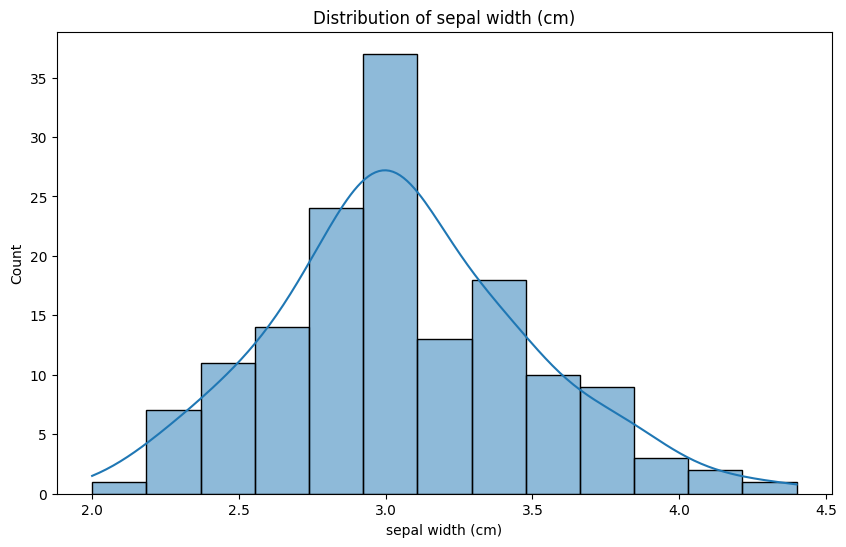


Summary Statistics for sepal width (cm):
count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width (cm), dtype: float64
Skewness: 0.32
Kurtosis: 0.23


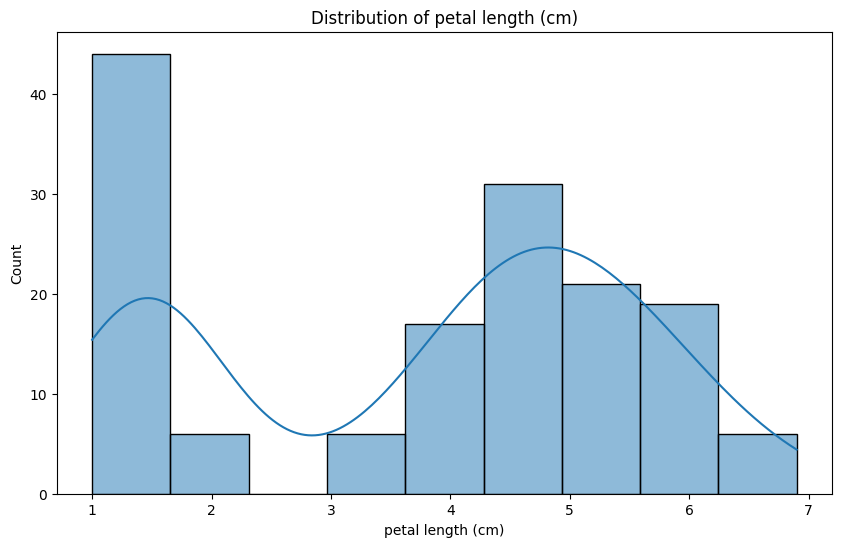


Summary Statistics for petal length (cm):
count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal length (cm), dtype: float64
Skewness: -0.27
Kurtosis: -1.40


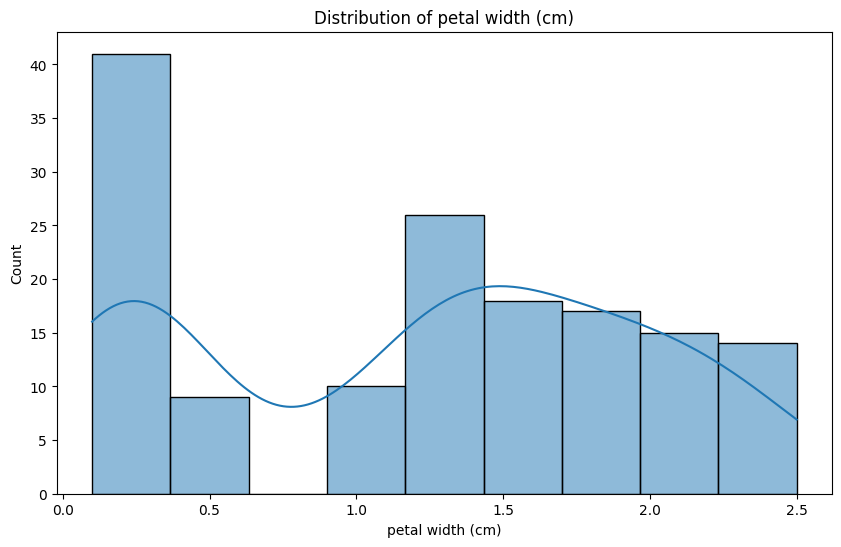


Summary Statistics for petal width (cm):
count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width (cm), dtype: float64
Skewness: -0.10
Kurtosis: -1.34


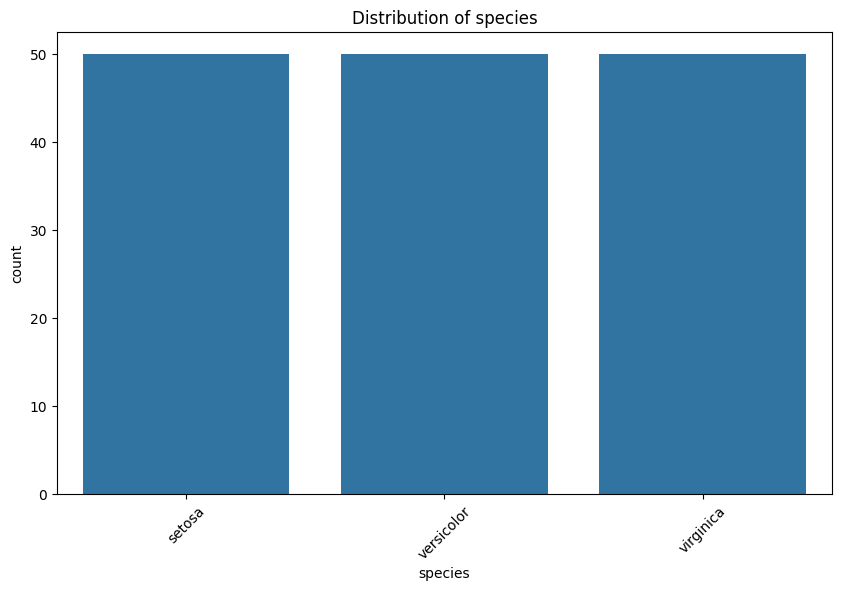


Value Counts for species:
species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

=== Data Comparison Report ===


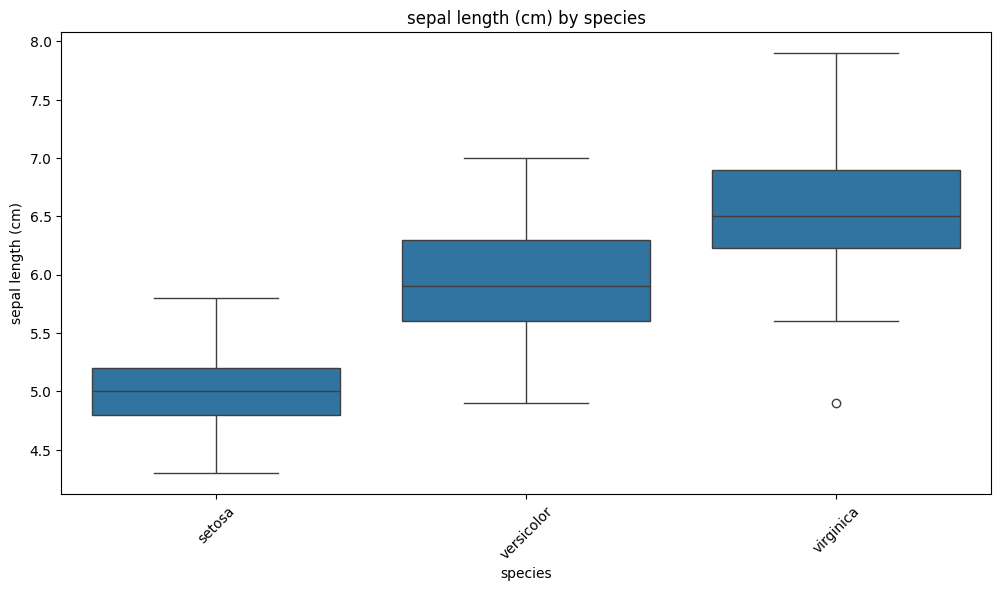


ANOVA test for sepal length (cm) across species:
F-statistic: 119.26
p-value: 0.0000


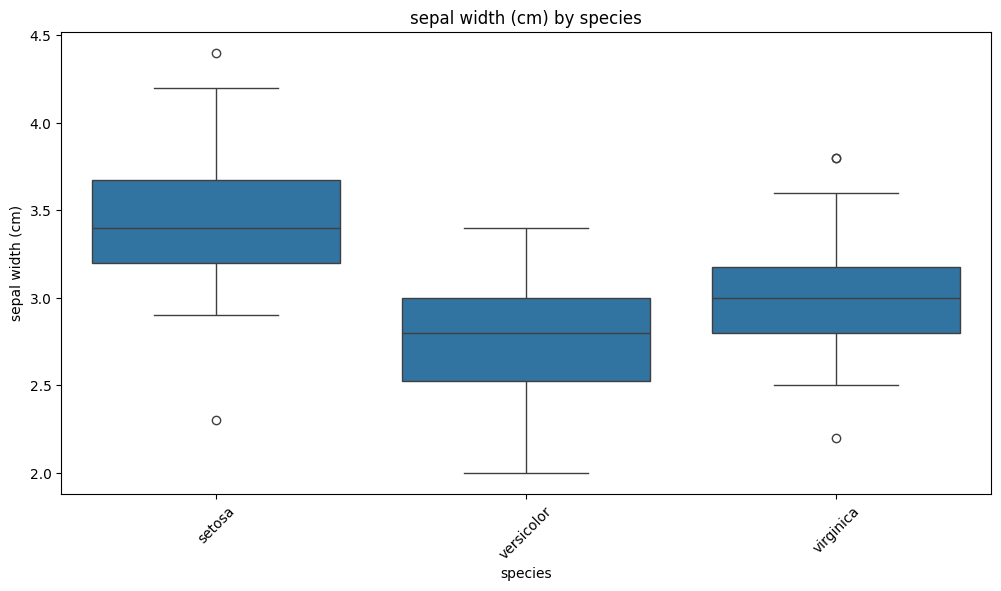


ANOVA test for sepal width (cm) across species:
F-statistic: 49.16
p-value: 0.0000


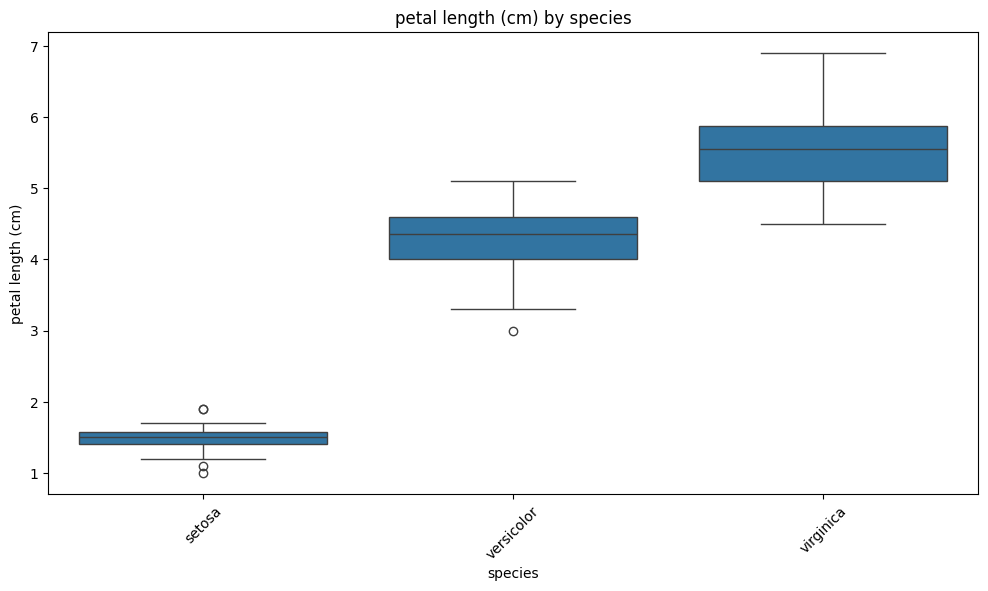


ANOVA test for petal length (cm) across species:
F-statistic: 1180.16
p-value: 0.0000


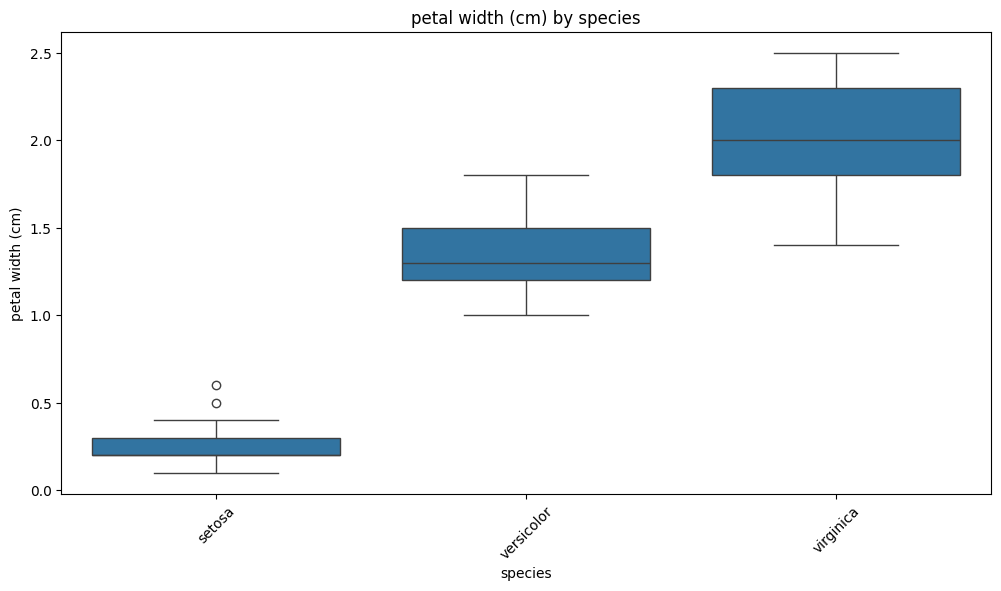


ANOVA test for petal width (cm) across species:
F-statistic: 960.01
p-value: 0.0000

=== Data Relationship Report ===


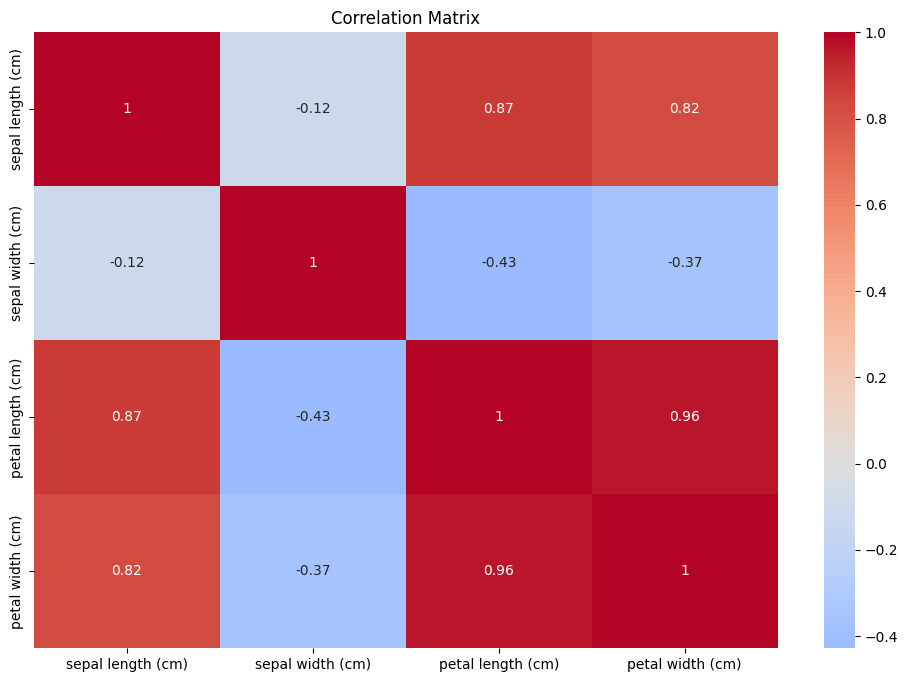

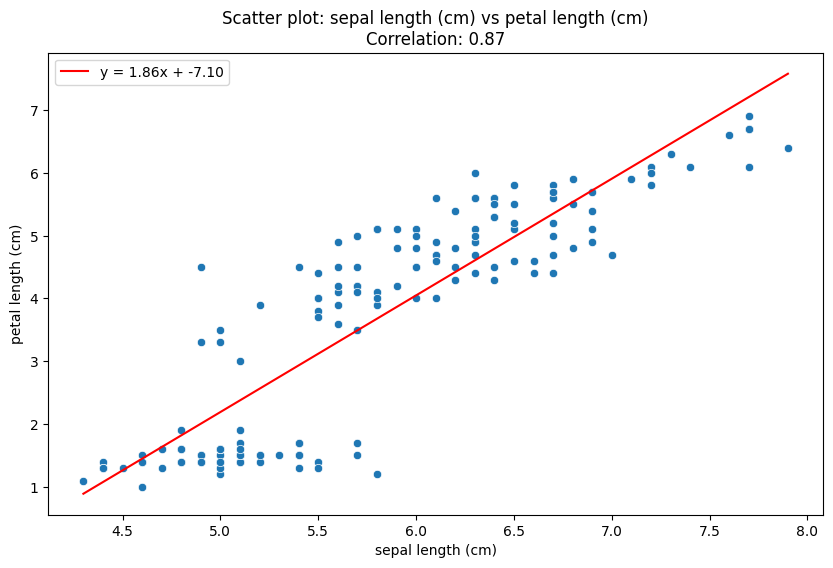


Regression Analysis: petal length (cm) vs sepal length (cm)
Slope: 1.8584
Intercept: -7.1014
R-squared: 0.7600
P-value: 0.0000
Standard Error: 0.0859


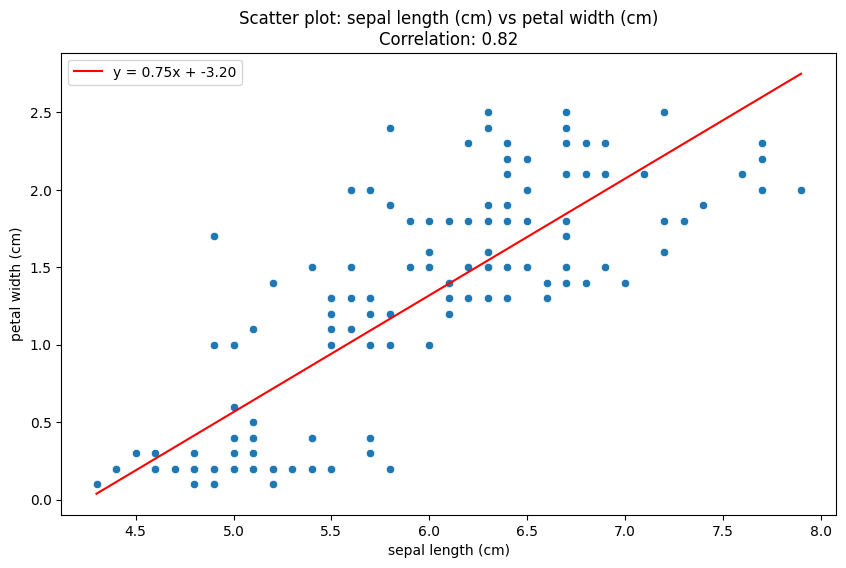


Regression Analysis: petal width (cm) vs sepal length (cm)
Slope: 0.7529
Intercept: -3.2002
R-squared: 0.6690
P-value: 0.0000
Standard Error: 0.0435


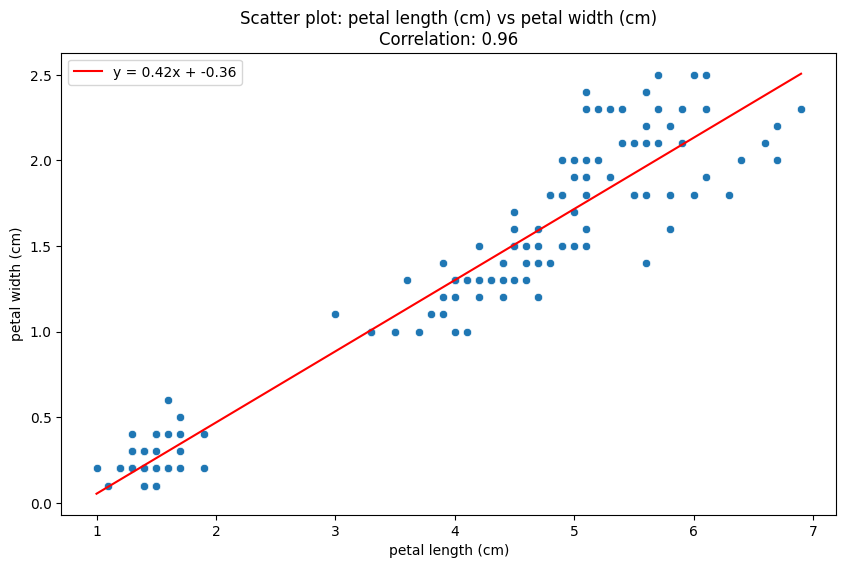


Regression Analysis: petal width (cm) vs petal length (cm)
Slope: 0.4158
Intercept: -0.3631
R-squared: 0.9271
P-value: 0.0000
Standard Error: 0.0096


In [12]:
# Load example dataset (iris)
from sklearn.datasets import load_iris

# Create DataFrame
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Generate full analysis
generate_full_analysis(df)